In [1]:
%run ./PPS_Expansion_Model.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
ts = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - ts * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

In [3]:
##Pre-Training
###SCZ
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(a_distances, scz_cp, scz_slope)

##Post-Training
###SCZ
ymin = 385
ymax = 426
scz_cp_post = 100 - 1.361 * v
scz_slope_post = 1 / 0.061  # negative

SCZ_RTs_post = RTsig(a_distances, scz_cp_post, scz_slope_post)

In [4]:
## Fitted model

Lex, Pr = 1.963e00, 1.044e-01

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)
_, _, _, _, SCZ_Model_RTs = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    0,
)

SCZ_Model_RTs_pre = fit_RT(SCZ_Model_RTs, SCZ_RTs)

In [5]:
## Fitted model

Lex, Pr = 1.963e00, 1.044e-01
rho_0 = 6.159e-05
sigav_x, locav_x = 5.394e00, 3.271e01

k_a = 5e-05
k_v = 5e-05
stim_counts = 10

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    0.05,
    sigav_x,
    locav_x,
)


_, _, _, _, SCZ_Model_RTs_post = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

SCZ_Model_RTs_post = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)

In [6]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

stim_counts = 10
k_a = 5e-05
k_v = 5e-05
theta = 0.05

Lex, Pr = 1.963e00, 1.044e-01

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

_, _, _, _, SCZrtpost_alter = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

SCZ_Model_RTs_post_alter = fit_RT(SCZrtpost_alter, SCZ_RTs_post)

In [7]:
model_a_distances = np.linspace(a_distances[0], a_distances[-1], 100)

ymin, ymax = np.min(SCZ_Model_RTs_pre), np.max(SCZ_Model_RTs_pre)
SCZ_CP_Model_pre, SCZ_SLOPE_Model_pre = fitting(a_distances, SCZ_Model_RTs_pre)
SCZ_Model_RTs_pre_fit = RTsig(model_a_distances, SCZ_CP_Model_pre, SCZ_SLOPE_Model_pre)

ymin, ymax = np.min(SCZ_Model_RTs_post), np.max(SCZ_Model_RTs_post)
SCZ_CP_Model_post, SCZ_SLOPE_Model_post = fitting(a_distances, SCZ_Model_RTs_post)
SCZ_Model_RTs_post_fit = RTsig(
    model_a_distances, SCZ_CP_Model_post, SCZ_SLOPE_Model_post
)

ymin, ymax = np.min(SCZ_Model_RTs_post_alter), np.max(SCZ_Model_RTs_post_alter)
SCZ_CP_Model_post_alter, SCZ_SLOPE_Model_post_alter = fitting(
    a_distances, SCZ_Model_RTs_post_alter
)
SCZ_Model_RTs_post_alter_fit = RTsig(
    model_a_distances, SCZ_CP_Model_post_alter, SCZ_SLOPE_Model_post_alter
)

In [8]:
import seaborn as sns

sns.set_context("paper")
sns.set_theme(
    style="ticks",
    palette=["black", "grey", "grey"],
    rc={"axes.labelsize": 14, "axes.labelweight": "bold"},
)

/tmp/ipykernel_23435/1419746503.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


Text(0, 0.5, 'RT (ms)')

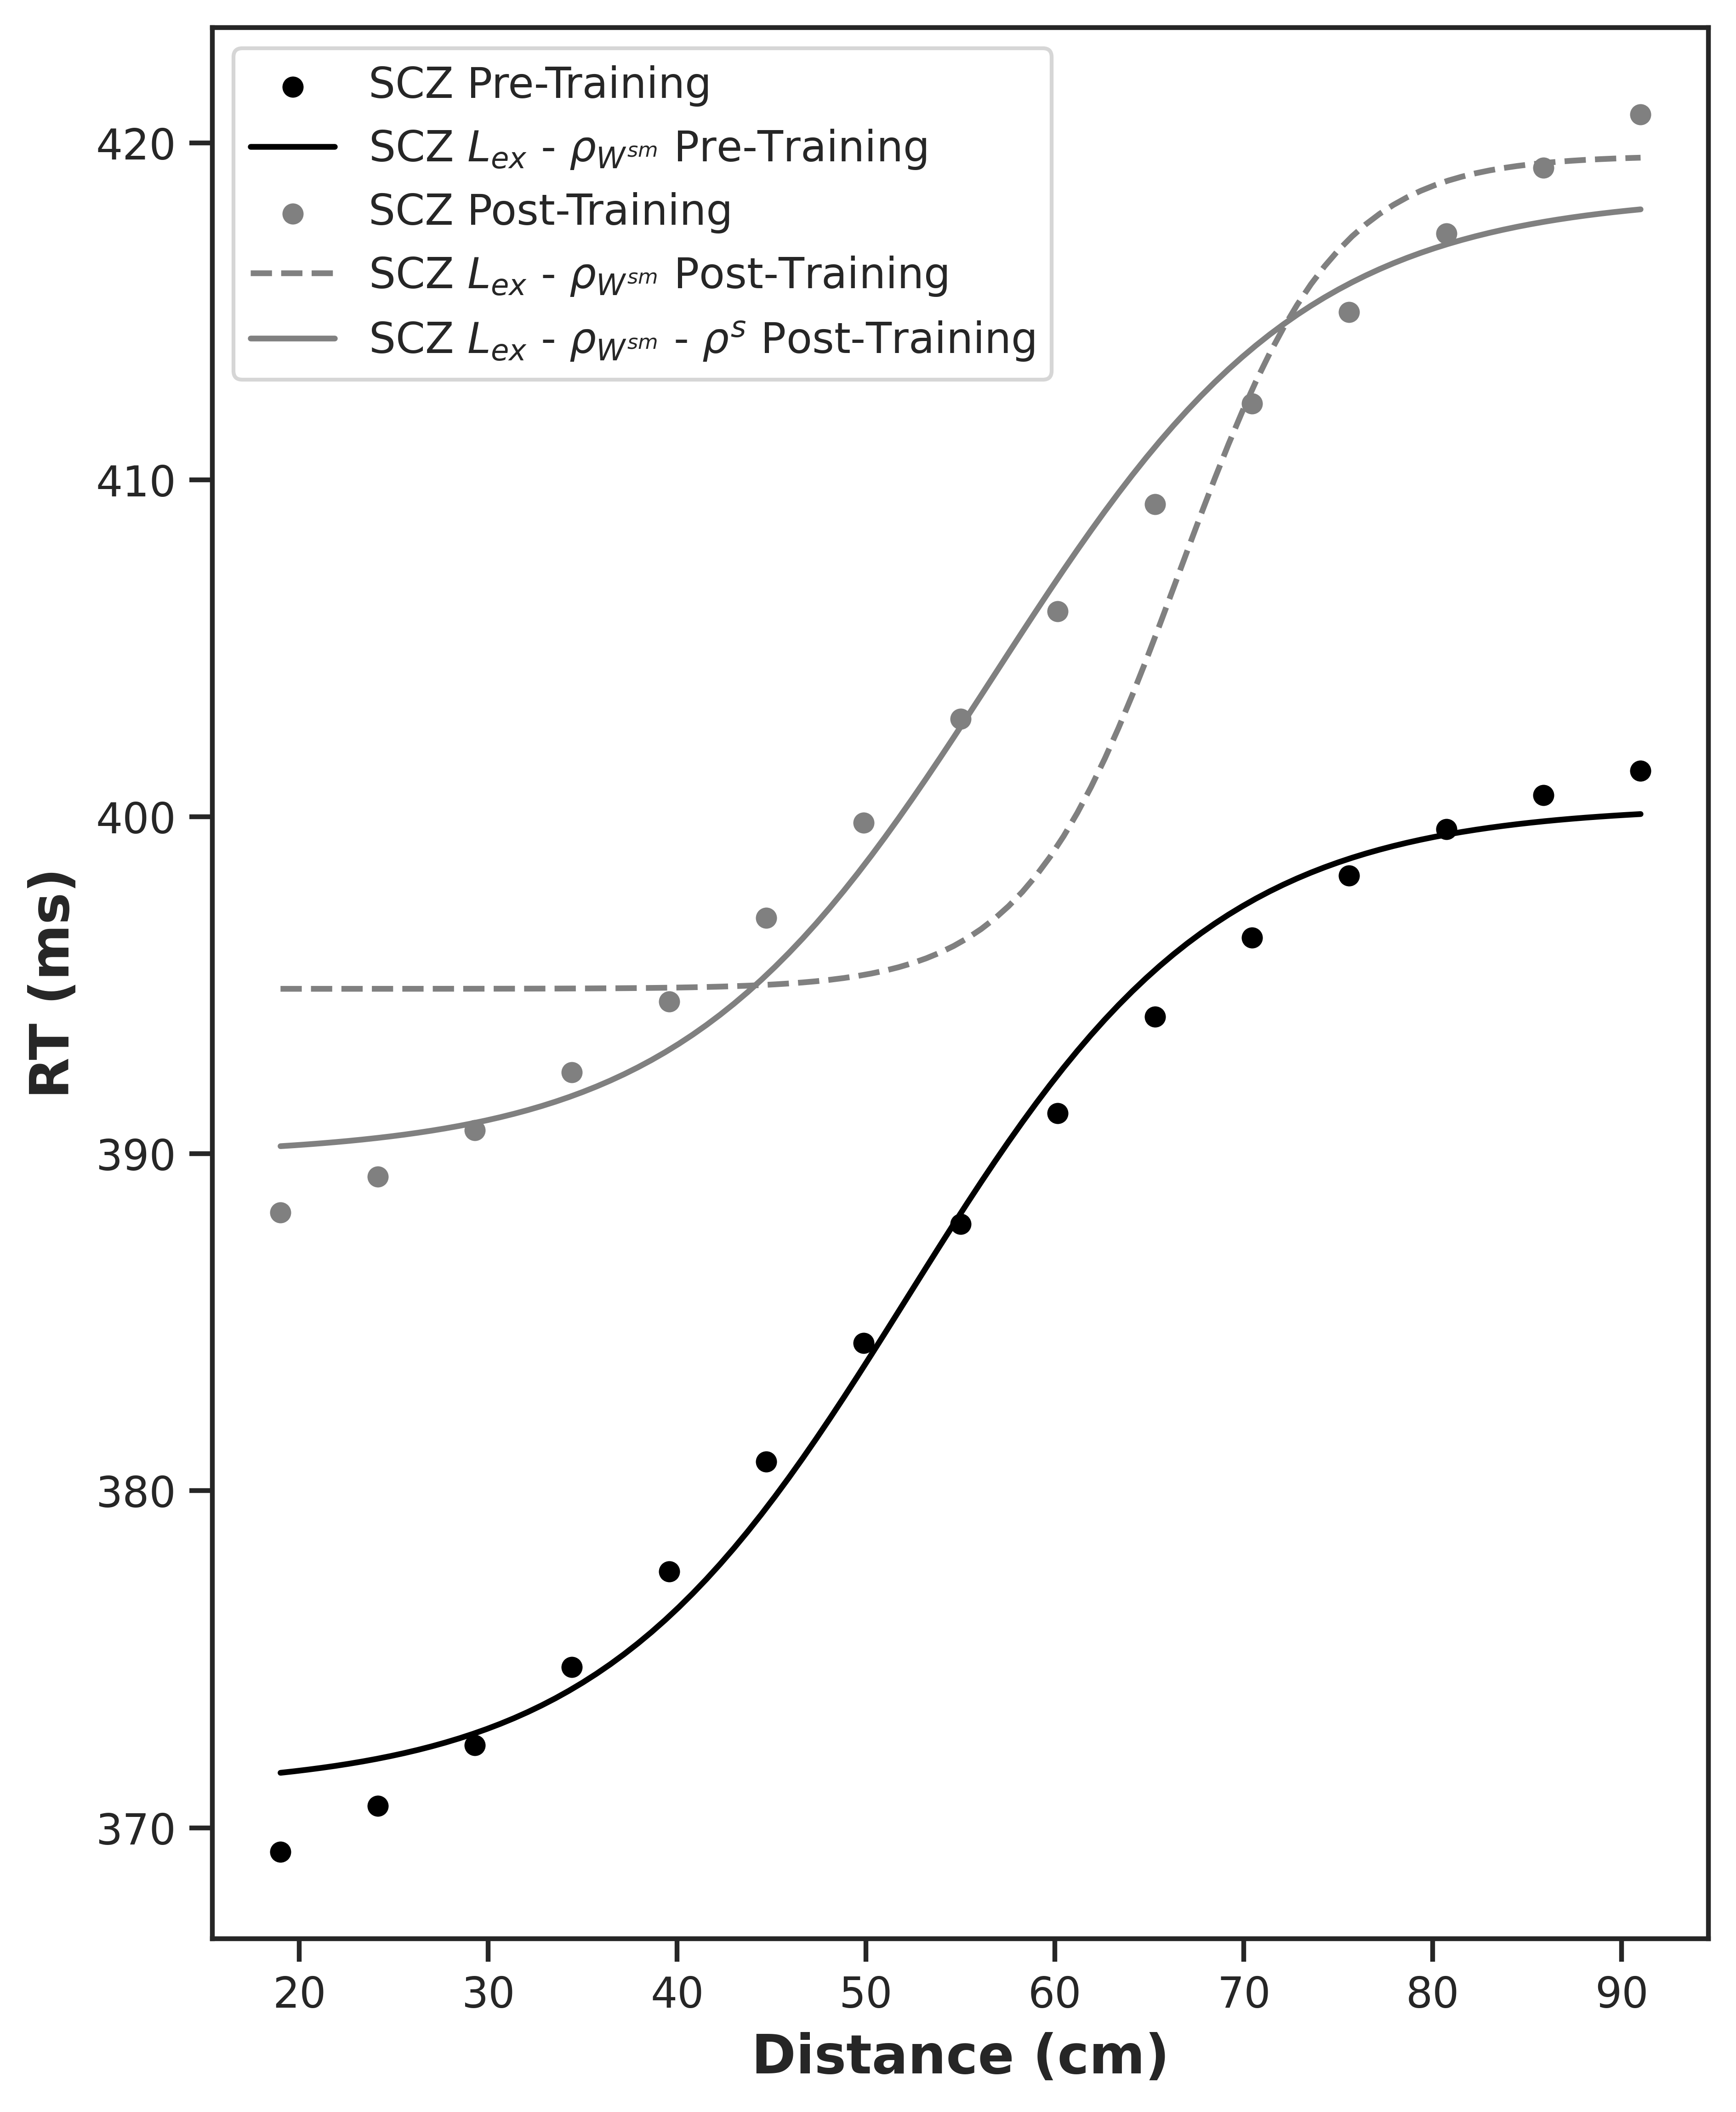

In [83]:
fig, axs = plt.subplots(1, 1, figsize=(7, 9), dpi=600)
ax1 = plt.subplot(111)

sns.scatterplot(x=a_distances, y=SCZ_RTs, label="SCZ Pre-Training", ax=ax1)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_pre_fit,
    label="SCZ $L_{ex}$ - " + r"$\rho_{{W}^{sm}}$ Pre-Training",
    ax=ax1,
)
sns.scatterplot(
    x=a_distances, y=SCZ_RTs_post, label="SCZ Post-Training", ax=ax1, palette="gray"
)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_post_alter_fit,
    label="SCZ $L_{ex}$ - " + r"$\rho_{{W}^{sm}}$ Post-Training",
    ax=ax1,
    linestyle="--",
)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_post_fit,
    label="SCZ $L_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\rho^{s}$ Post-Training",
    ax=ax1,
)

ax1.set_xlabel("Distance (cm)")
ax1.set_ylabel("RT (ms)")

fig.savefig("drafts/FIG3.eps", bbox_inches="tight", format="eps")

In [10]:
##Pre-Training
###HC
ymin = 280
ymax = 331
hc_cp = 100 - 1.377 * 30
hc_slope = 1 / 0.11

HC_RTs = RTsig(a_distances, hc_cp, hc_slope)

##Post-Training
###HC
ymin = 277
ymax = 335
hc_cp_post = 100 - 1.028 * 30
hc_slope_post = 1 / 0.18  # negative

HC_RTs_post = RTsig(a_distances, hc_cp_post, hc_slope_post)

In [71]:
## Fitted model

rho_0, siagav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)

HCWa_tr, HCWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    0.05,
    siagav_x,
    locav_x,
)


_, _, _, _, HC_Model_RTs_post = experiment(
    ts,
    simtime,
    a_distances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa_tr[:, :, -1, -1],
    HCWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

HC_Model_RTs_post = fit_RT(HC_Model_RTs_post, HC_RTs_post)

_, _, _, _, HC_Model_RTs_pre = experiment(
    ts,
    simtime,
    a_distances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

HC_Model_RTs_pre = fit_RT(HC_Model_RTs_pre, HC_RTs)

In [79]:
model_a_distances = np.linspace(a_distances[0], a_distances[-1], 100)

ymin, ymax = np.min(HC_Model_RTs_pre), np.max(HC_Model_RTs_pre)
HC_CP_Model_pre, HC_SLOPE_Model_pre = fitting(a_distances, HC_Model_RTs_pre)
HC_Model_RTs_pre_fit = RTsig(model_a_distances, HC_CP_Model_pre, HC_SLOPE_Model_pre)

ymin, ymax = np.min(HC_Model_RTs_post), np.max(HC_Model_RTs_post)
HC_CP_Model_post, HC_SLOPE_Model_post = fitting(a_distances, HC_Model_RTs_post)
HC_Model_RTs_post_fit = RTsig(
    model_a_distances, HC_CP_Model_post, HC_SLOPE_Model_post
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


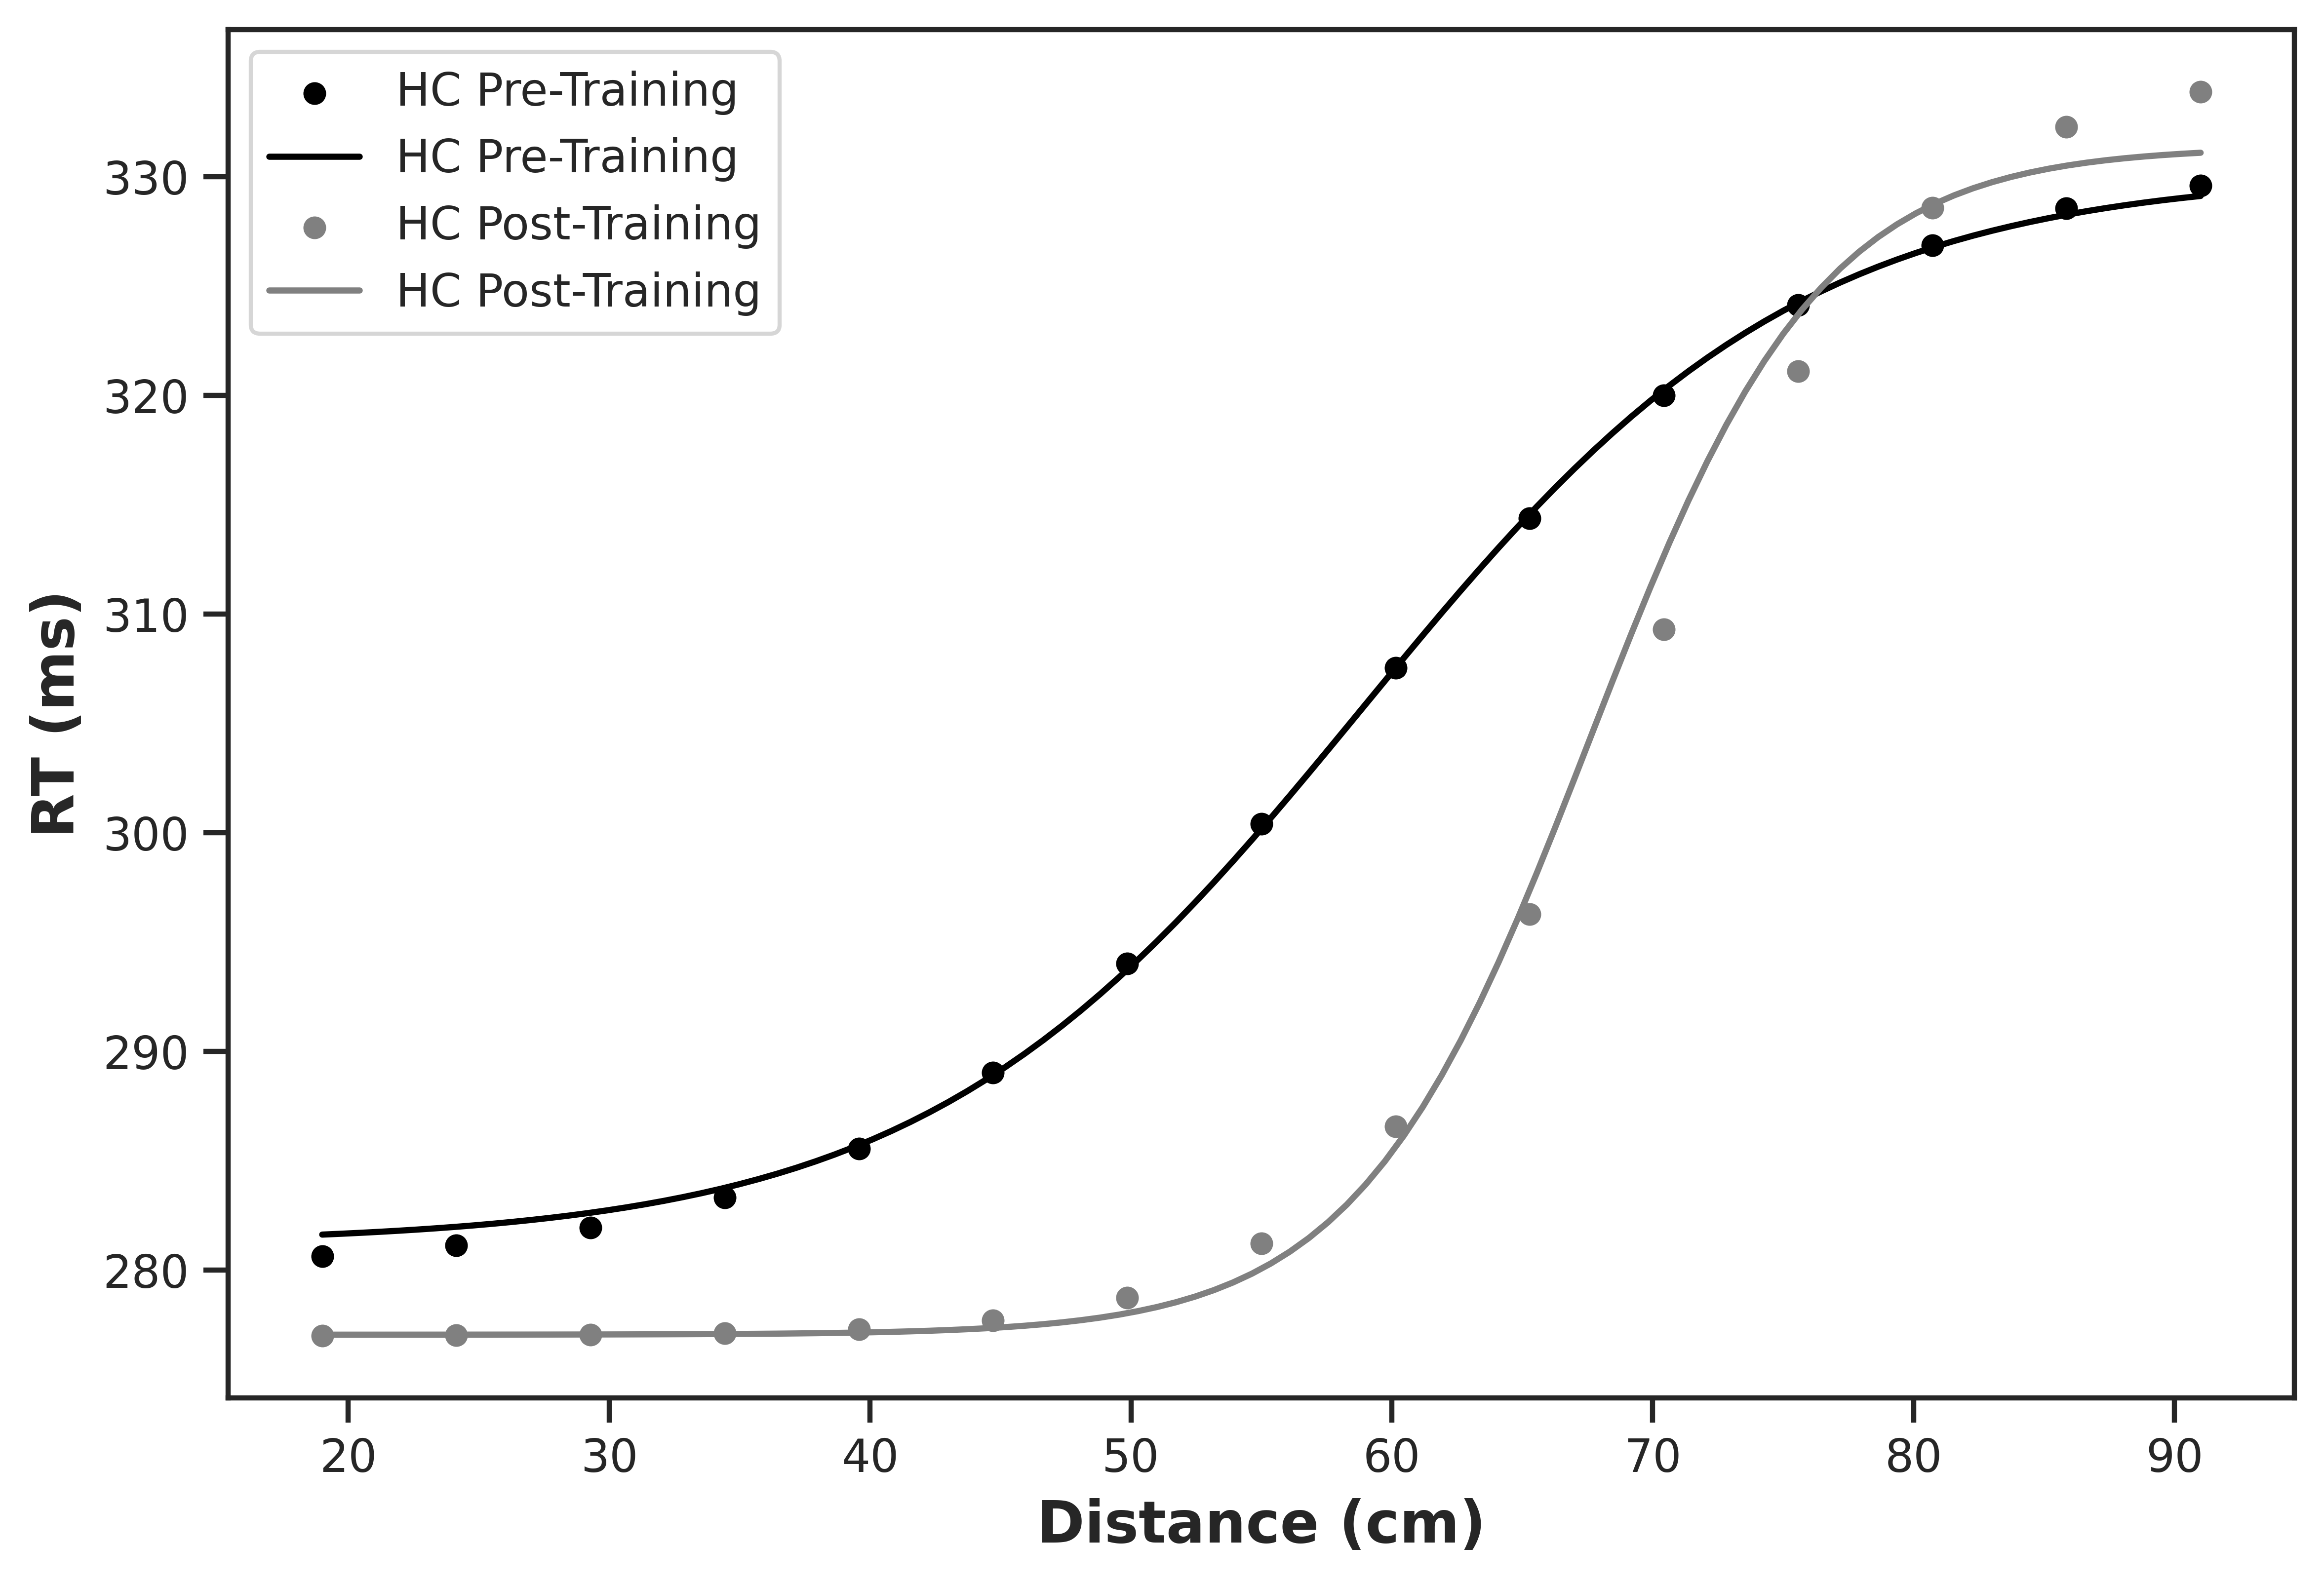

In [88]:
fig, axs = plt.subplots(1, 1, figsize=(9, 6), dpi=600)
ax1 = plt.subplot(111)

sns.scatterplot(x=a_distances, y=HC_RTs, label="HC Pre-Training", ax=ax1)
sns.lineplot(
    x=model_a_distances,
    y=HC_Model_RTs_pre_fit,
    label="HC Pre-Training",
    ax=ax1,
)
sns.scatterplot(x=a_distances, y=HC_RTs_post, label="HC Post-Training", ax=ax1)

sns.lineplot(
    x=model_a_distances,
    y=HC_Model_RTs_post_fit,
    label="HC Post-Training",
    ax=ax1,
)

ax1.set_xlabel("Distance (cm)")
ax1.set_ylabel("RT (ms)")

fig.savefig("drafts/FIG0.eps", bbox_inches="tight", format="eps")